# Lab2_1 (Optional)Custom object detection with multi bounding box - example

* This is the extension of Lab2 to show the example of multi bounding box usecase
* This Lab does not related to ML training or SageMaker
* You need to fininish Lab2 first

In [1]:
import os 

## Multi bounding box usecase

* Let's say you want to detect Model number and Serial number of your AirPods box

<img src="./airpods-serial-number-w-bbx.png" style="width:500px;"/>

## Data annotation example

In [53]:
mbbx=Image.open('airpods-serial-number.png')
mbbx.size

(802, 566)

In [118]:
mbbx_annotation = {
    "file": "airpods-serial-number-w-bbx.png",
    "image_size": [
        {
            "width": 802,
            "height": 566,
            "depth": 3
        }
    ],
    "annotations": [
        {
            "class_id": "0",
            "left": 35,
            "top": 38,
            "width": 90,
            "height": 22
        },
        {
            "class_id": "1",
            "left": 65,
            "top": 105,
            "width": 75,
            "height": 20
        }
    ],
    "categories": [
        {
            "class_id": 0,
            "name": "Model"
        },
        {
            "class_id": 1,
            "name": "Serial"
        }
    ]
}

## Visualize multi bbx

* Update the visualize_detection function to support multi box

In [68]:
import matplotlib.pyplot as plt
def visualize_detection(img_file, dets, code, thresh=0.6):
        import random
        import matplotlib.image as mpimg

        img=mpimg.imread(img_file)
        plt.imshow(img)
        height = img.shape[0]
        width = img.shape[1]
        colors = dict()
        for det in dets:
            (klass, score, x0, y0, x1, y1) = det
            if score < thresh:
                continue
            cls_id = int(klass)
            if cls_id not in colors:
                colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = x0 * width
            ymin = y0 * height
            xmax = x1 * width
            ymax = y1 * height
            rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 edgecolor=colors[cls_id],
                                 linewidth=3.5)
            plt.gca().add_patch(rect)
            class_name = str(cls_id)
            #if classes and len(classes) > cls_id:class_name = classes[cls_id]
            plt.gca().text(xmin, ymin - 2,
                            '{:s} {:.3f}'.format(code[klass], score),
                            bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                                    fontsize=12, color='white')

        plt.show()

* After model training, your inference prediction will look like below:

In [121]:
prediction = [[0, 0.87, 0.13725490196078433, 0.14901960784313725, 0.49019607843137253, 0.23529411764705882],
              [1, 0.67, 0.2549019607843137, 0.4117647058823529, 0.5490196078431373, 0.49019607843137253]]

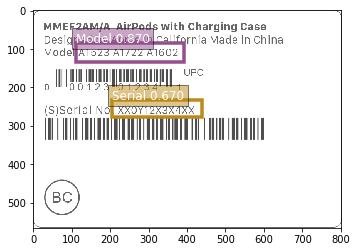

In [122]:
visualize_detection('airpods-serial-number.png', prediction, ['Model','Serial'], 0.4)